# Mandar_FMST

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import sklearn.model_selection as ms
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer, classification_report

In [3]:
Sample = pd.read_excel("Future_predictions.xlsx")
Data = pd.read_csv("signal-data.csv")

In [4]:
Data.drop("Time", axis = 1, inplace = True)

In [5]:
Sample.drop("Time", axis = 1, inplace = True)
Sample = Sample.mask(Sample == 0, Sample.median(skipna = True), axis = 1 )
Sample.fillna(Sample.median(skipna = True), inplace = True)
Sample.dropna(how='all', axis=1, inplace=True)
Data = Data.mask(Data == 0, Data.median(skipna = True), axis = 1 )
Data.fillna(Data.median(skipna = True), inplace = True)
Data.dropna(how='all', axis=1, inplace=True)

In [7]:
mean = Sample.mean()
std = Sample.std()
Sample = (Sample - mean)/std.clip(lower = 0.1)

In [9]:
print(Data.shape)

(18, 570)
(1567, 591)


In [10]:
pca = PCA(n_components = 10)
pca.fit(Data.drop("Pass/Fail", axis = 1))
print(pca.explained_variance_ratio_)

[0.59422562 0.24203467 0.0918645  0.02296915 0.0146371  0.00520642
 0.00321709 0.00306432 0.00251286 0.00233091]


In [11]:
Data.head()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,72.33325,0.5005,0.0118,0.0035,2.3630,0.0205,0.0148,0.0046,71.96175,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.20450,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.20450,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.86020,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.86020,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.84320,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.84320,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,72.33325,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.84320,-1


There aren't too many significant columns so we take them all.  

In [12]:
Data_X_temp = Data.drop("Pass/Fail", axis = 1)
mean2 = Data_X_temp.mean()
std2 = Data_X_temp.std()
Data_X_temp = (Data_X_temp - mean2)/std2.clip(lower = 0.1)
Data_y = Data["Pass/Fail"]

In [13]:
#Data_X_temp.drop([x for x in Data_X_temp.columns if int(x) not in Sample.columns], inplace = True, axis = 1)

In [14]:
Data_X_temp.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,0.224391,0.849252,-0.436291,0.034037,-0.050105,0.0,-0.564174,0.017503,0.376399,0.170458,...,-0.002745,-0.186760,0.004038,-0.035168,-0.003464,-0.196994,-0.009578,-0.016738,-0.006829,-0.314042
1,1.106934,-0.382984,1.016653,0.153860,-0.059566,0.0,0.197576,0.022503,0.337399,0.003458,...,0.010255,2.237847,0.018038,0.069832,0.016536,0.384990,-0.118578,0.036262,0.007171,1.153293
2,-1.113645,0.798646,-0.481293,0.688397,-0.047431,0.0,-0.906479,0.016503,-0.192601,0.049458,...,0.098255,0.001092,-0.042962,0.003832,0.000536,0.029878,0.369422,0.319262,0.095171,-0.196665
3,-0.350044,-0.199009,-0.051688,-1.109439,-0.050814,0.0,0.502501,-0.007497,0.253399,-0.115542,...,-0.005745,-0.159815,-0.010962,-0.050168,-0.013464,-0.283270,-0.012578,-0.015738,-0.008829,-0.293779
4,0.242219,0.087300,1.116870,-0.158939,-0.047018,0.0,-0.115917,0.010503,0.402399,-0.022542,...,-0.002745,-0.186760,-0.200962,4.612832,1.006536,26.904748,-0.012578,-0.015738,-0.008829,-0.293779


In [15]:
Data_X = pd.DataFrame(pca.transform(Data_X_temp))

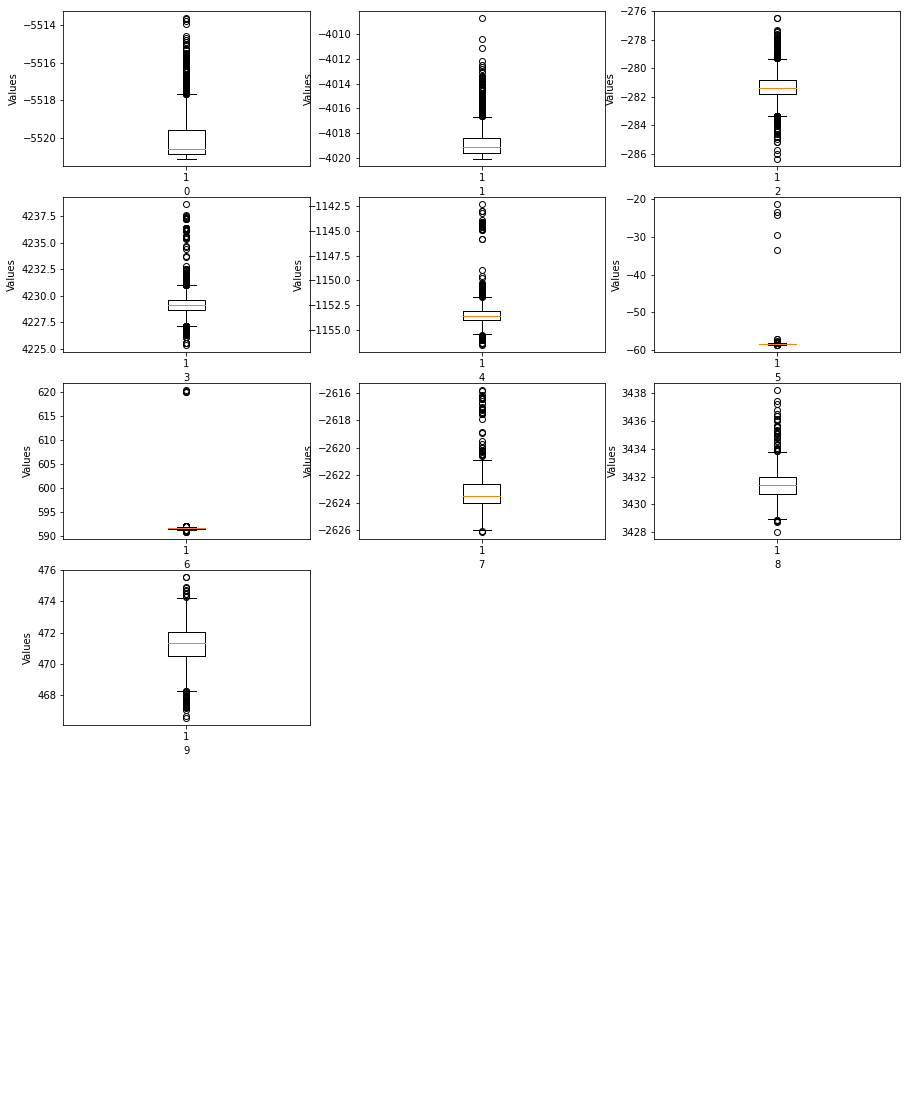

In [16]:
# Generically define how many plots along and across
ncols = 3
nrows = 6
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 20))

# Lazy counter so we can remove unwanted axes
counter = 0
for i in range(nrows):
    for j in range(ncols):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(Data_X.columns):

            ax.boxplot(x = Data_X[Data_X.columns[counter]])
            ax.set_xlabel(Data_X.columns[counter])
            ax.set_ylabel('Values')
        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

we can see that owing to the size of the data there are significant outliers in each case. 

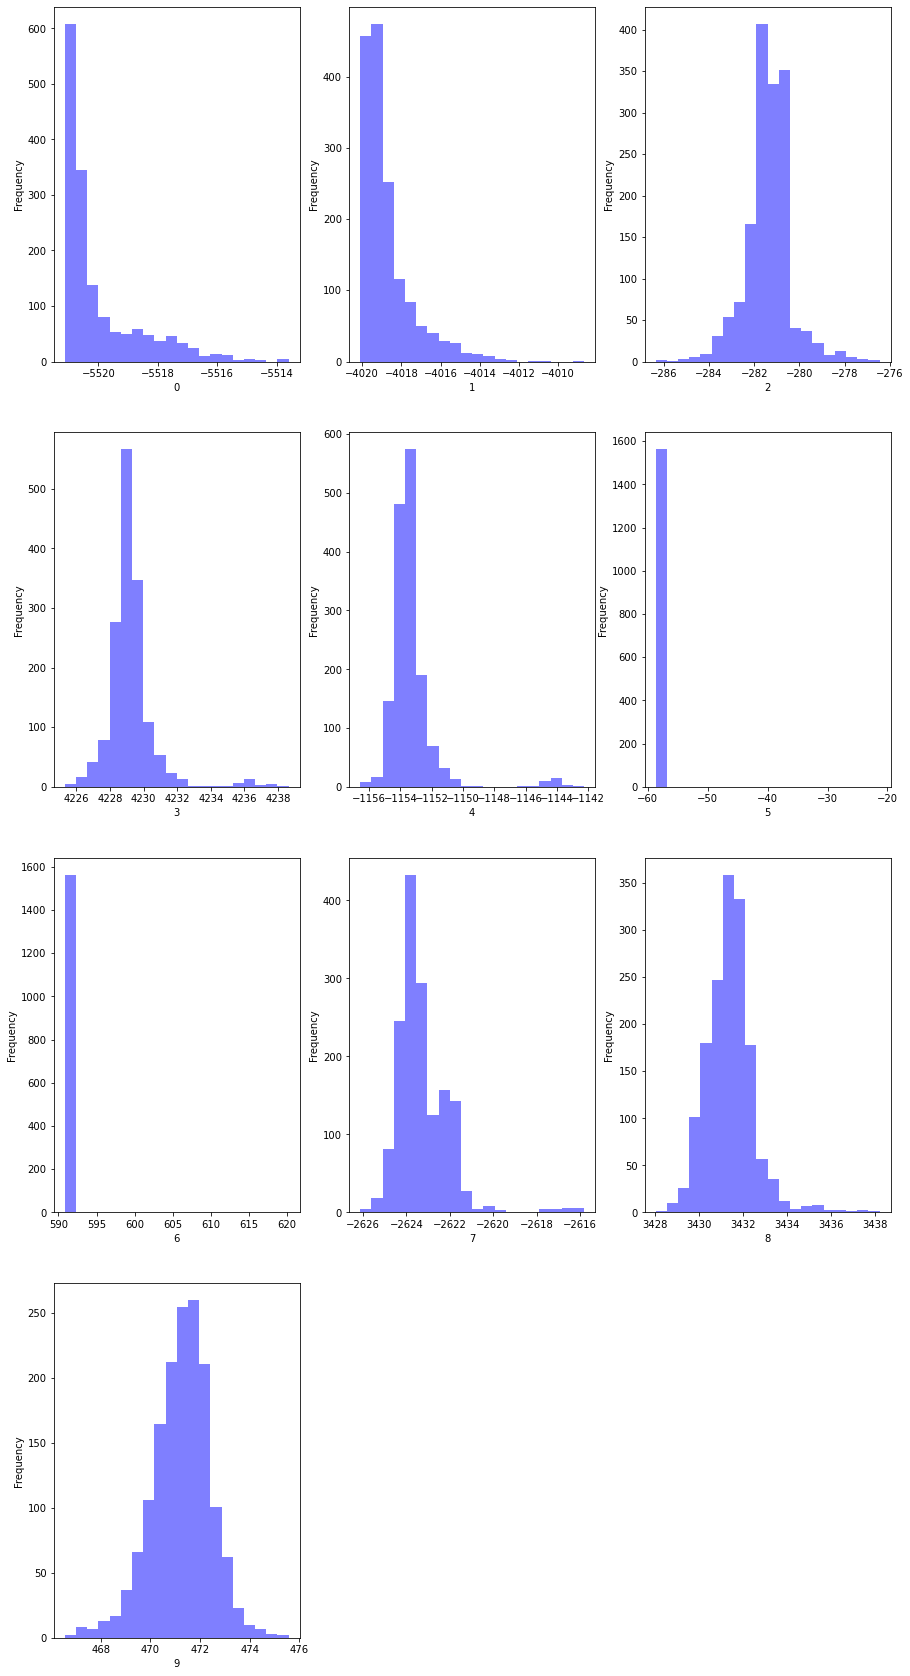

In [17]:
# Generically define how many plots along and across
ncols = 3
nrows = 4
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 30))

# Lazy counter so we can remove unwanted axes
counter = 0
for i in range(nrows):
    for j in range(ncols):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(Data_X.columns):

            ax.hist(Data_X[Data_X.columns[counter]], bins=20, color='blue', alpha=0.5,
            label='{}'.format(Data_X.columns[counter]))
            ax.set_xlabel(Data_X.columns[counter])
            ax.set_ylabel('Frequency')
        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

We can see that all plots are roughly bell shaped centered at 0.

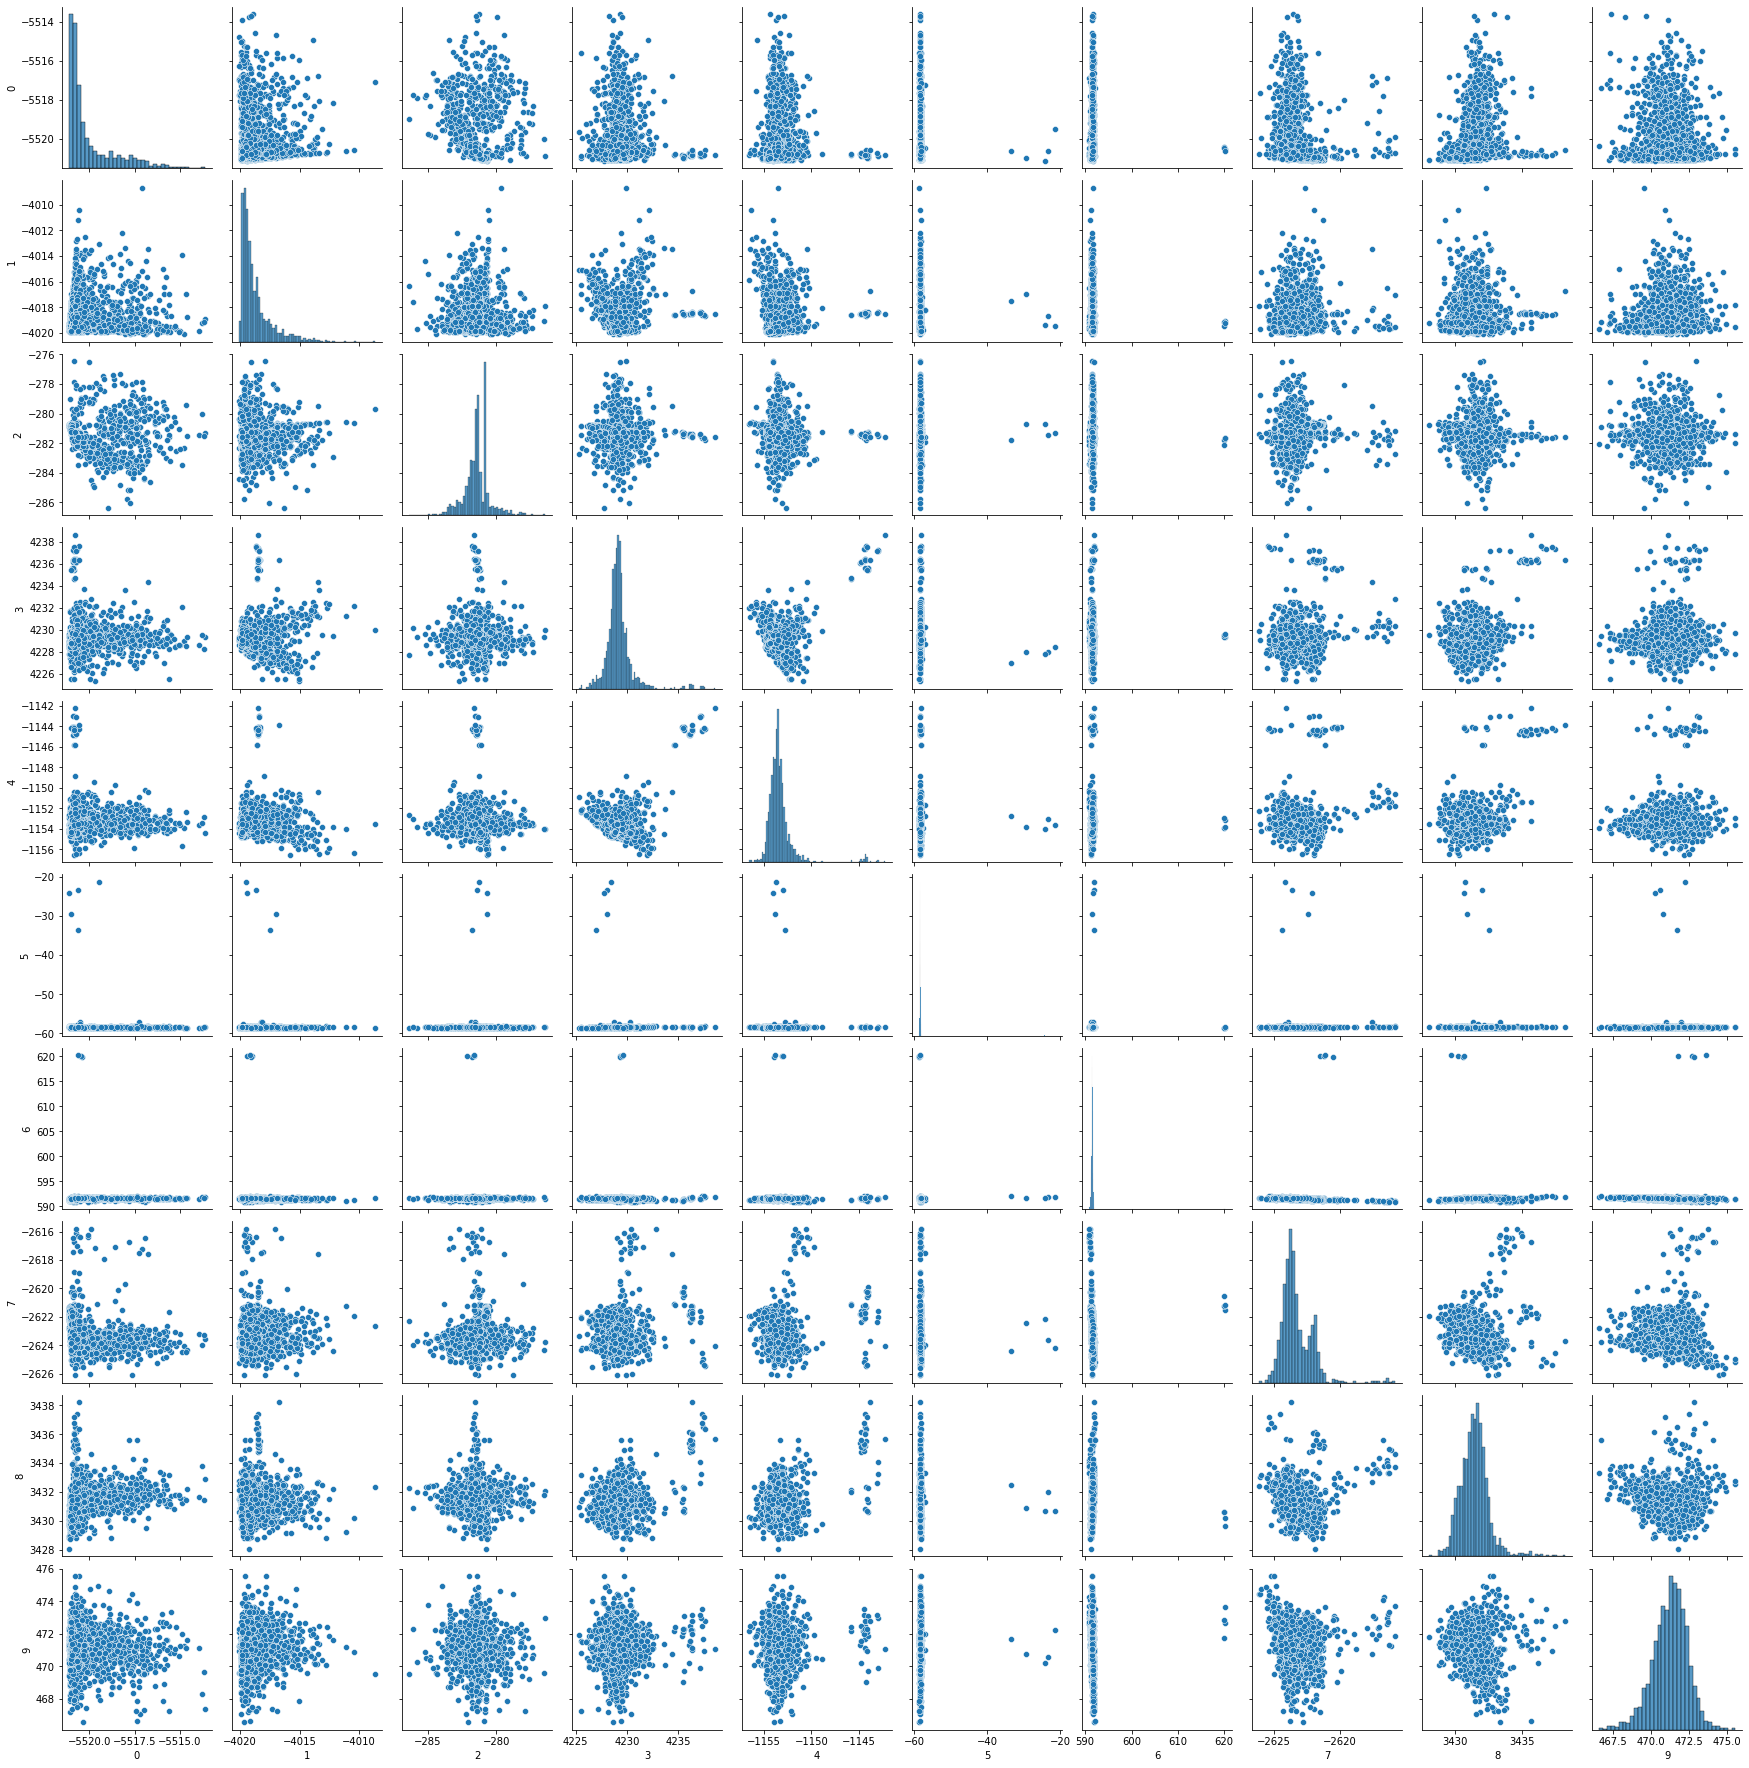

In [18]:
sns.pairplot(Data_X)

we see that all variables are mostly uncorrelated, with bell shaped distributions. 

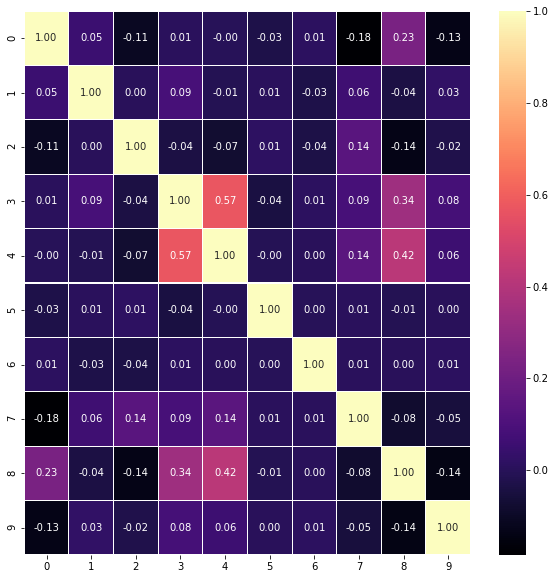

In [19]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(Data_X.corr(), ax = ax, annot = True, linewidth = 0.05, fmt = '0.2f', cmap = 'magma') # color intensity
plt.show()

We again see that all variables are roughly uncorrelated.

<AxesSubplot:xlabel='Pass/Fail', ylabel='count'>

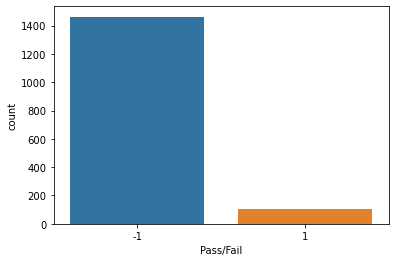

In [20]:
sns.countplot(x = Data_y, data = Data_y)

In [21]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over1, y_over1 = oversample.fit_resample(Data_X, Data_y)

<AxesSubplot:xlabel='Pass/Fail', ylabel='count'>

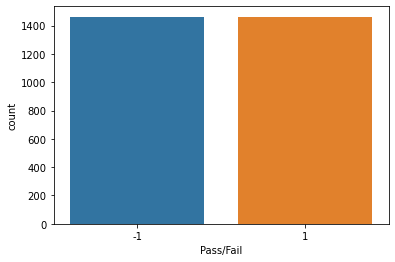

In [22]:
sns.countplot(x = y_over1, data = y_over1)

In [23]:
X_train, X_test, y_train, y_test = ms.train_test_split(X_over1, y_over1, test_size = 0.2, stratify = y_over1, random_state=3)

since I have used stratify, the train-test split will have similar statistical characteristics as the original data. 

In [24]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred_train = dt.predict(X_train)
print("Train accuracy score = %.4f"% accuracy_score(y_train, y_pred_train))
print("Test accuracy score = %.4f"% accuracy_score(y_test, y_pred))

Train accuracy score = 1.0000
Test accuracy score = 0.9625


In [25]:
# Variables for average classification report
originalclass = []
predictedclass = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score


### Decision Tree

In [46]:
from sklearn.model_selection import GridSearchCV
seed = 7
model = DecisionTreeClassifier()
param_grid = {'min_samples_split' : list(range(2,12,2)), 'min_samples_leaf' :list(range(1,20,2)), 'max_features' : list(range(1,6,2)) }
grid = GridSearchCV( model , param_grid = param_grid, cv = 5)
grid.fit(X_over1, y_over1)
grid.best_params_

{'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [106]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
model0 = DecisionTreeClassifier(max_features = 3,min_samples_leaf = 1, min_samples_split = 2)
results = cross_val_score(model0, X_over1, y_over1, cv=kfold, scoring=make_scorer(classification_report_with_accuracy_score))
#print(results)
print("Accuracy: %.3f%% which will most probably be affected within (\u00B1%.3f%%)depending on the data" % (results.mean()*100.0, 2*results.std()*100.0)) # 2 std devs for 95th percentile.
print(classification_report(originalclass, predictedclass))

Accuracy: 95.802% which will most probably be affected within (±5.176%)depending on the data
              precision    recall  f1-score   support

          -1       0.89      0.81      0.85    400996
           1       0.82      0.90      0.86    399373

    accuracy                           0.86    800369
   macro avg       0.86      0.86      0.86    800369
weighted avg       0.86      0.86      0.86    800369



In [107]:
from sklearn.model_selection import LeaveOneOut
loocv = LeaveOneOut()
X_over2 = X_over1.values
y_over2 = y_over1.values
model2 = DecisionTreeClassifier(max_features = 3,min_samples_leaf = 1, min_samples_split = 2)
results = cross_val_score(model2, X_over1, y_over1, cv=LeaveOneOut(), scoring=make_scorer(classification_report_with_accuracy_score))
print("Accuracy: %.3f%% which will most probably be affected within(\u00B1%.3f%%)depending on the data" % (results.mean()*100.0, 2*results.std()*100.0))
print(classification_report(originalclass, predictedclass))

Accuracy: 96.651% which will most probably be affected within(±35.984%)depending on the data
              precision    recall  f1-score   support

          -1       0.89      0.81      0.85    402459
           1       0.82      0.90      0.86    400836

    accuracy                           0.86    803295
   macro avg       0.86      0.86      0.86    803295
weighted avg       0.86      0.86      0.86    803295



Dimensionality reduction, attribute removal, standardisation/normalisation, target balancing etc. have already been done. 

### KNN

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
seed = 7
model = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1,9,2)),
             'algorithm': ('auto', 'ball_tree', 'kd_tree' , 'brute') }
grid = GridSearchCV( model , param_grid = param_grid, cv = 5)
grid.fit(X_over1, y_over1)
grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 1}

In [104]:

num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
model3 = KNeighborsClassifier(n_neighbors = 1)
results = cross_val_score(model3, X_over1, y_over1, cv=kfold, scoring=make_scorer(classification_report_with_accuracy_score))
#print(results)
print("Accuracy: %.3f%% which will most probably be affected within (\u00B1%.3f%%)depending on the data" % (results.mean()*100.0, 2*results.std()*100.0)) # 2 std devs for 95th percentile.
print(classification_report(originalclass, predictedclass))

Accuracy: 97.032% which will most probably be affected within (±4.185%)depending on the data
              precision    recall  f1-score   support

          -1       0.89      0.81      0.85    398070
           1       0.82      0.90      0.86    396447

    accuracy                           0.85    794517
   macro avg       0.86      0.86      0.85    794517
weighted avg       0.86      0.85      0.85    794517



In [105]:
from sklearn.model_selection import LeaveOneOut
loocv = LeaveOneOut()
X_over2 = X_over1.values
y_over2 = y_over1.values
model4 = KNeighborsClassifier(n_neighbors = 1)
results = cross_val_score(model4, X_over1, y_over1, cv=LeaveOneOut(), scoring=make_scorer(classification_report_with_accuracy_score))
print("Accuracy: %.3f%% which will most probably be affected within(\u00B1%.3f%%)depending on the data" % (results.mean()*100.0, 2*results.std()*100.0))
print(classification_report(originalclass, predictedclass))

Accuracy: 97.129% which will most probably be affected within(±33.397%)depending on the data
              precision    recall  f1-score   support

          -1       0.89      0.81      0.85    399533
           1       0.82      0.90      0.86    397910

    accuracy                           0.86    797443
   macro avg       0.86      0.86      0.86    797443
weighted avg       0.86      0.86      0.86    797443



### Gaussian Naive Bayes

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
seed = 7
model = GaussianNB()
param_grid = {'var_smoothing' : [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3] }
grid = GridSearchCV( model , param_grid = param_grid, cv = 5)
grid.fit(X_over1, y_over1)
grid.best_params_

{'var_smoothing': 1e-09}

In [102]:

num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
model5 = GaussianNB()
results = cross_val_score(model5, X_over1, y_over1, cv=kfold, scoring=make_scorer(classification_report_with_accuracy_score))
#print(results)
print("Accuracy: %.3f%% which will most probably be affected within (\u00B1%.3f%%)depending on the data" % (results.mean()*100.0, 2*results.std()*100.0)) # 2 std devs for 95th percentile.
print(classification_report(originalclass, predictedclass))

Accuracy: 54.858% which will most probably be affected within (±14.344%)depending on the data
              precision    recall  f1-score   support

          -1       0.89      0.81      0.85    395144
           1       0.82      0.90      0.86    393521

    accuracy                           0.86    788665
   macro avg       0.86      0.86      0.86    788665
weighted avg       0.86      0.86      0.86    788665



In [103]:
from sklearn.model_selection import LeaveOneOut
loocv = LeaveOneOut()
X_over2 = X_over1.values
y_over2 = y_over1.values
model6 = GaussianNB()
results = cross_val_score(model6, X_over1, y_over1, cv=LeaveOneOut(), scoring=make_scorer(classification_report_with_accuracy_score))
print("Accuracy: %.3f%% which will most probably be affected within(\u00B1%.3f%%)depending on the data" % (results.mean()*100.0, 2*results.std()*100.0))
print(classification_report(originalclass, predictedclass))

Accuracy: 55.707% which will most probably be affected within(±99.346%)depending on the data
              precision    recall  f1-score   support

          -1       0.89      0.81      0.85    396607
           1       0.82      0.90      0.86    394984

    accuracy                           0.85    791591
   macro avg       0.86      0.85      0.85    791591
weighted avg       0.86      0.85      0.85    791591



### Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression
num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
model7 = LogisticRegression(max_iter = 1000)
results = cross_val_score(model7, X_over1, y_over1, cv=kfold, scoring=make_scorer(classification_report_with_accuracy_score))
#print(results)
print("Accuracy: %.3f%% which will most probably be affected within (\u00B1%.3f%%)depending on the data" % (results.mean()*100.0, 2*results.std()*100.0)) # 2 std devs for 95th percentile.
print(classification_report(originalclass, predictedclass))

Accuracy: 56.283% which will most probably be affected within (±15.739%)depending on the data
              precision    recall  f1-score   support

          -1       0.89      0.81      0.85    393681
           1       0.83      0.90      0.86    392058

    accuracy                           0.86    785739
   macro avg       0.86      0.86      0.86    785739
weighted avg       0.86      0.86      0.86    785739



In [83]:
from sklearn.model_selection import LeaveOneOut
loocv = LeaveOneOut()
X_over2 = X_over1.values
y_over2 = y_over1.values
model8 = LogisticRegression(max_iter = 1000)
results = cross_val_score(model8, X_over1, y_over1, cv=LeaveOneOut(), scoring=make_scorer(classification_report_with_accuracy_score))
print("Accuracy: %.3f%% which will most probably be affected within(\u00B1%.3f%%)depending on the data" % (results.mean()*100.0, 2*results.std()*100.0))
print(classification_report(originalclass, predictedclass))

Accuracy: 61.722% which will most probably be affected within(±97.213%)depending on the data
              precision    recall  f1-score   support

          -1       0.89      0.81      0.85    380266
           1       0.82      0.90      0.86    380235

    accuracy                           0.86    760501
   macro avg       0.86      0.86      0.85    760501
weighted avg       0.86      0.86      0.85    760501



### Random Forest

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
seed = 7
model = RandomForestClassifier()
param_grid = {'min_samples_split' : list(range(2,12,2)), 'min_samples_leaf' :list(range(1,20,2)), 'max_features' : list(range(1,6,2)) }
grid = GridSearchCV( model , param_grid = param_grid, cv = 5)
grid.fit(X_over1, y_over1)
grid.best_params_

{'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [115]:

num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
model9 = RandomForestClassifier(max_features = 1,min_samples_leaf = 1, min_samples_split = 2)
results = cross_val_score(model9, X_over1, y_over1, cv=kfold, scoring=make_scorer(classification_report_with_accuracy_score))
#print(results)
print("Accuracy: %.3f%% which will most probably be affected within (\u00B1%.3f%%)depending on the data" % (results.mean()*100.0, 2*results.std()*100.0)) # 2 std devs for 95th percentile.
print(classification_report(originalclass, predictedclass))

Accuracy: 99.863% which will most probably be affected within (±0.928%)depending on the data
              precision    recall  f1-score   support

          -1       0.90      0.81      0.85    409345
           1       0.83      0.90      0.86    406766

    accuracy                           0.86    816111
   macro avg       0.86      0.86      0.86    816111
weighted avg       0.86      0.86      0.86    816111



In [114]:
from sklearn.model_selection import LeaveOneOut
loocv = LeaveOneOut()
X_over2 = X_over1.values
y_over2 = y_over1.values
model10 = RandomForestClassifier(max_features = 1,min_samples_leaf = 1, min_samples_split = 2)
results = cross_val_score(model10, X_over1, y_over1, cv=LeaveOneOut(), scoring=make_scorer(classification_report_with_accuracy_score))
print("Accuracy: %.3f%% which will most probably be affected within(\u00B1%.3f%%)depending on the data" % (results.mean()*100.0, 2*results.std()*100.0))
print(classification_report(originalclass, predictedclass))

Accuracy: 99.897% which will most probably be affected within(±6.401%)depending on the data
              precision    recall  f1-score   support

          -1       0.89      0.81      0.85    407882
           1       0.83      0.90      0.86    405303

    accuracy                           0.86    813185
   macro avg       0.86      0.86      0.86    813185
weighted avg       0.86      0.86      0.86    813185



### Gradient Boosting

In [112]:
from sklearn.model_selection import GridSearchCV
seed = 7
model = GradientBoostingClassifier()
param_grid = {'ccp_alpha' : list(range(0,12,2)), 'max_features' : list(range(1,8,2)) }
grid = GridSearchCV( model , param_grid = param_grid, cv = 5)
grid.fit(X_over1, y_over1)
grid.best_params_

{'ccp_alpha': 0, 'max_features': 7}

In [99]:

num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
model11 = GradientBoostingClassifier(max_features = 5, ccp_alpha = 0)
results = cross_val_score(model11, X_over1, y_over1, cv=kfold, scoring=make_scorer(classification_report_with_accuracy_score))
#print(results)
print("Accuracy: %.3f%% which will most probably be affected within (\u00B1%.3f%%)depending on the data" % (results.mean()*100.0, 2*results.std()*100.0)) # 2 std devs for 95th percentile.
print(classification_report(originalclass, predictedclass))

Accuracy: 92.179% which will most probably be affected within (±8.665%)depending on the data
              precision    recall  f1-score   support

          -1       0.90      0.81      0.85    390755
           1       0.83      0.91      0.86    389132

    accuracy                           0.86    779887
   macro avg       0.86      0.86      0.86    779887
weighted avg       0.86      0.86      0.86    779887



In [109]:
from sklearn.model_selection import LeaveOneOut
loocv = LeaveOneOut()
X_over2 = X_over1.values
y_over2 = y_over1.values
model12 = GradientBoostingClassifier(max_features = 5, ccp_alpha = 0)
results = cross_val_score(model12, X_over1, y_over1, cv=LeaveOneOut(), scoring=make_scorer(classification_report_with_accuracy_score))
print("Accuracy: %.3f%% which will most probably be affected within(\u00B1%.3f%%)depending on the data" % (results.mean()*100.0, 2*results.std()*100.0))
print(classification_report(originalclass, predictedclass))

Accuracy: 91.934% which will most probably be affected within(±54.461%)depending on the data
              precision    recall  f1-score   support

          -1       0.89      0.81      0.85    403922
           1       0.82      0.90      0.86    402299

    accuracy                           0.86    806221
   macro avg       0.86      0.86      0.86    806221
weighted avg       0.86      0.86      0.86    806221



### AdaBoosting

In [94]:
from sklearn.model_selection import GridSearchCV
seed = 7
model = AdaBoostClassifier()
param_grid = {'n_estimators' : list(range(10,201,10))}
grid = GridSearchCV( model , param_grid = param_grid, cv = 5)
grid.fit(X_over1, y_over1)
grid.best_params_

{'n_estimators': 190}

In [98]:

num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
model13 = AdaBoostClassifier(n_estimators = 190)
results = cross_val_score(model13, X_over1, y_over1, cv=kfold, scoring=make_scorer(classification_report_with_accuracy_score))
#print(results)
print("Accuracy: %.3f%% which will most probably be affected within (\u00B1%.3f%%)depending on the data" % (results.mean()*100.0, 2*results.std()*100.0)) # 2 std devs for 95th percentile.
print(classification_report(originalclass, predictedclass))

Accuracy: 89.957% which will most probably be affected within (±7.695%)depending on the data
              precision    recall  f1-score   support

          -1       0.90      0.81      0.85    389292
           1       0.83      0.91      0.86    387669

    accuracy                           0.86    776961
   macro avg       0.86      0.86      0.86    776961
weighted avg       0.86      0.86      0.86    776961



In [111]:
from sklearn.model_selection import LeaveOneOut
loocv = LeaveOneOut()
X_over2 = X_over1.values
y_over2 = y_over1.values
model14 = AdaBoostClassifier(n_estimators = 50)
results = cross_val_score(model14, X_over1, y_over1, cv=LeaveOneOut(), scoring=make_scorer(classification_report_with_accuracy_score))
print("Accuracy: %.3f%% which will most probably be affected within(\u00B1%.3f%%)depending on the data" % (results.mean()*100.0, 2*results.std()*100.0))
print(classification_report(originalclass, predictedclass))

Accuracy: 77.102% which will most probably be affected within(±84.035%)depending on the data
              precision    recall  f1-score   support

          -1       0.89      0.81      0.85    406419
           1       0.82      0.90      0.86    403840

    accuracy                           0.86    810259
   macro avg       0.86      0.86      0.86    810259
weighted avg       0.86      0.86      0.86    810259



We see that Random forest model is the best model providing 99.897% average accuracy on the test set, with a tolerance of 6.401%. This is out best model.  

In [117]:
import pickle
filename = 'RandomForestClassifierModel'
outfile = open(filename,'wb')
pickle.dump(model10,outfile)
outfile.close()

In [128]:
Sample = pd.read_excel("Future_predictions.xlsx")
Sample.drop("Time", axis = 1, inplace = True)
Sample = Sample.replace(np.nan,0)
Sample = Sample.mask(Sample == 0, Sample.median(skipna = True), axis = 1 )
Sample.fillna(Sample.median(skipna = True), inplace = True)
Sample.dropna(how='all', axis=1, inplace=True)
#pca.transform(Sample)
model10.fit(X_over1, y_over1)
model10.predict(pca.transform(Sample))

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1], dtype=int64)

# Conclusion
We imported the data, cleaned it, applied pca on it to reduce dimensions, did univariate and bivariate statistical analysis on the data and Split it into training and test sets. This split was then used once to train decision tree model. We used cross-validation and hyperparameter tuning techniques on 7 models which are Decision Tree, KNN, Gaussian Naive Bayes, Logistic Regression, Random Forest, Gradient boosting and Adaboosting. In doing so we described the effect of different in data by taking the average and 2 std devs over the accuracy scores obtained in cross-validation. We finally tried to predict the outcomes of some custom readings, and the classifier model predicted that all will pass.    